In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [141]:
review=pd.read_excel('review형태소.xlsx')
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57364 entries, 0 to 57363
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     57364 non-null  object
 1   평점      57364 non-null  int64 
 2   리뷰내용    57363 non-null  object
 3   리뷰명사    57364 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.8+ MB


In [142]:
review.head()

,상품명,평점,리뷰내용,리뷰명사
0,라벨르 베이직셔츠,5,두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담...,"['두께', '디자인', '색감', '맘', '가격', '담', '색도']"
1,라벨르 베이직셔츠,4,딱 기본 셔츠하게 좋아요! 부들부들한데 너무 빳빳한 소재도 아닌게 딱 여리해보이고 ...,"['기본', '셔츠', '빳빳', '소재', '여리해', '보이', '생각', '안..."
2,라벨르 베이직셔츠,5,청바지에도 어울리고 슬랙스에도 어울리고 좋아요 !!,"['청바지', '슬랙스']"
3,라벨르 베이직셔츠,5,청바지에 입어도 예쁘고 치마랑 입어도 예뻐요!! 카라가 커서 기본템이어도 마냥 무난...,"['청바지', '치마', '카라', '커서', '기본', '템', '이어도', '마..."
4,라벨르 베이직셔츠,4,보들보들하니 딱 좋아용 ㅎ 소재 특성상 주름은 어쩔수 없지만 너무 예뻐요 자켓이랑 ...,"['소재', '특성', '주름', '수', '자켓', '더', '아유']"


# 평점, 리뷰 감성분석

### 1) 평점이 3점인 데이터를 제거하여 새로운 데이터를 만든 다음, 평점을 기준으로 1,2점은 부정 / 4,5점은 긍정으로 나눔

### 2) 1)번 데이터를 바탕으로 회귀, 분류 방법을 사용하여 train_test_split 수행
#### train=1,2,4,5점, test=3점

### 3) 2)번 데이터를 바탕으로 각 긍정, 부정에는 어떤 단어들이 주로 사용되었는지 파악함

------------------------------------------------------------------------

### 1) 평점이 3점인 데이터를 제거하여 새로운 데이터를 만든 다음, 평점을 기준으로 1,2점은 부정 / 4,5점은 긍정으로 나눔

In [4]:
review.head()

,상품명,평점,리뷰내용,리뷰명사
0,라벨르 베이직셔츠,5,두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담...,"['두께', '디자인', '색감', '맘', '가격', '담', '색도']"
1,라벨르 베이직셔츠,4,딱 기본 셔츠하게 좋아요! 부들부들한데 너무 빳빳한 소재도 아닌게 딱 여리해보이고 ...,"['기본', '셔츠', '빳빳', '소재', '여리해', '보이', '생각', '안..."
2,라벨르 베이직셔츠,5,청바지에도 어울리고 슬랙스에도 어울리고 좋아요 !!,"['청바지', '슬랙스']"
3,라벨르 베이직셔츠,5,청바지에 입어도 예쁘고 치마랑 입어도 예뻐요!! 카라가 커서 기본템이어도 마냥 무난...,"['청바지', '치마', '카라', '커서', '기본', '템', '이어도', '마..."
4,라벨르 베이직셔츠,4,보들보들하니 딱 좋아용 ㅎ 소재 특성상 주름은 어쩔수 없지만 너무 예뻐요 자켓이랑 ...,"['소재', '특성', '주름', '수', '자켓', '더', '아유']"


In [5]:
review1245=review['평점'] !=3 
reviewnp=review[review1245] #train

In [6]:
reviewnp['평점'].value_counts()

5    42491
4     9989
2      518
1      420
Name: 평점, dtype: int64

In [7]:
review3=review['평점']==3
review_3=review[review3] #test

In [8]:
review_3.head()

,상품명,평점,리뷰내용,리뷰명사
43,로망드 라운드카라 롱원피스,3,디자인 깔끔하고 바이올렛 컬러도 예뻐요\n가슴부분이 타이트한건 아쉽네요ㅠㅠ\n글래머...,"['디자인', '바이올렛', '컬러', '가슴', '부분', '타이', '트', '..."
65,로망드 라운드카라 롱원피스,3,타이트한 핏이구요 생각보다 소재가 너무 얇네요 ㅠ 라인이 다 드러나요 ㅠ 옷은 단정...,"['타이트', '핏이구', '생각', '소재', '라인', '옷']"
67,로망드 라운드카라 롱원피스,3,사진보고 홀딱반해서 샀는데 아쉬운부분이있당\n색은 사진보다 더 밝고 연함 사진처럼 ...,"['사진', '보고', '홀딱', '부분', '색', '사진', '더', '사진',..."
86,로망드 라운드카라 롱원피스,3,디자인 깔끔하고 바이올렛 컬러도 예뻐요\n가슴부분이 타이트한건 아쉽네요ㅠㅠ\n글래머...,"['디자인', '바이올렛', '컬러', '가슴', '부분', '타이', '트', '..."
108,로망드 라운드카라 롱원피스,3,타이트한 핏이구요 생각보다 소재가 너무 얇네요 ㅠ 라인이 다 드러나요 ㅠ 옷은 단정...,"['타이트', '핏이구', '생각', '소재', '라인', '옷']"


In [9]:
reviewnp['긍부정분류'] = [-1 if s <3 else 1 for s in reviewnp['평점']]
reviewnp

<ipython-input-9-97a9f8d2e150>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewnp['긍부정분류'] = [-1 if s <3 else 1 for s in reviewnp['평점']]


,상품명,평점,리뷰내용,리뷰명사,긍부정분류
0,라벨르 베이직셔츠,5,두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담...,"['두께', '디자인', '색감', '맘', '가격', '담', '색도']",1
1,라벨르 베이직셔츠,4,딱 기본 셔츠하게 좋아요! 부들부들한데 너무 빳빳한 소재도 아닌게 딱 여리해보이고 ...,"['기본', '셔츠', '빳빳', '소재', '여리해', '보이', '생각', '안...",1
2,라벨르 베이직셔츠,5,청바지에도 어울리고 슬랙스에도 어울리고 좋아요 !!,"['청바지', '슬랙스']",1
3,라벨르 베이직셔츠,5,청바지에 입어도 예쁘고 치마랑 입어도 예뻐요!! 카라가 커서 기본템이어도 마냥 무난...,"['청바지', '치마', '카라', '커서', '기본', '템', '이어도', '마...",1
4,라벨르 베이직셔츠,4,보들보들하니 딱 좋아용 ㅎ 소재 특성상 주름은 어쩔수 없지만 너무 예뻐요 자켓이랑 ...,"['소재', '특성', '주름', '수', '자켓', '더', '아유']",1
...,...,...,...,...,...
57359,힙스 조거팬츠,5,레깅스 말고도 편하게 입고 다닐만한 팬츠 찾고 있었어욤 \n대만족 입니당,"['레깅스', '팬츠', '욤', '만족']",1
57360,힙스 조거팬츠,5,착용감이 좋고 핏이 이뻐요 강추합니다\n\n\n(2020-09-22 22:17:22...,"['착용', '감', '핏', '강', '등록', '네이버', '페이', '구매',...",1
57361,힙스 조거팬츠,5,편하게 입기좋아요 티랑 같이구매했는데 딱이에요 편하고 핏도이뻐요,"['티', '구매', '핏']",1
57362,힙스 조거팬츠,5,편하게입고잇습니다~\n\n(2020-08-29 22:49:28 에 등록된 네이버 페...,"['등록', '네이버', '페이', '구매', '평']",1


In [10]:
reviewnp2=reviewnp.copy()
reviewnp2

,상품명,평점,리뷰내용,리뷰명사,긍부정분류
0,라벨르 베이직셔츠,5,두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담...,"['두께', '디자인', '색감', '맘', '가격', '담', '색도']",1
1,라벨르 베이직셔츠,4,딱 기본 셔츠하게 좋아요! 부들부들한데 너무 빳빳한 소재도 아닌게 딱 여리해보이고 ...,"['기본', '셔츠', '빳빳', '소재', '여리해', '보이', '생각', '안...",1
2,라벨르 베이직셔츠,5,청바지에도 어울리고 슬랙스에도 어울리고 좋아요 !!,"['청바지', '슬랙스']",1
3,라벨르 베이직셔츠,5,청바지에 입어도 예쁘고 치마랑 입어도 예뻐요!! 카라가 커서 기본템이어도 마냥 무난...,"['청바지', '치마', '카라', '커서', '기본', '템', '이어도', '마...",1
4,라벨르 베이직셔츠,4,보들보들하니 딱 좋아용 ㅎ 소재 특성상 주름은 어쩔수 없지만 너무 예뻐요 자켓이랑 ...,"['소재', '특성', '주름', '수', '자켓', '더', '아유']",1
...,...,...,...,...,...
57359,힙스 조거팬츠,5,레깅스 말고도 편하게 입고 다닐만한 팬츠 찾고 있었어욤 \n대만족 입니당,"['레깅스', '팬츠', '욤', '만족']",1
57360,힙스 조거팬츠,5,착용감이 좋고 핏이 이뻐요 강추합니다\n\n\n(2020-09-22 22:17:22...,"['착용', '감', '핏', '강', '등록', '네이버', '페이', '구매',...",1
57361,힙스 조거팬츠,5,편하게 입기좋아요 티랑 같이구매했는데 딱이에요 편하고 핏도이뻐요,"['티', '구매', '핏']",1
57362,힙스 조거팬츠,5,편하게입고잇습니다~\n\n(2020-08-29 22:49:28 에 등록된 네이버 페...,"['등록', '네이버', '페이', '구매', '평']",1


In [11]:
reviewnp2.loc[:,'상품명'] = reviewnp2.loc[:,'상품명'].astype('category').cat.codes
reviewnp2.loc[:,'리뷰내용'] = reviewnp2.loc[:,'리뷰내용'].astype('category').cat.codes
reviewnp2.loc[:,'리뷰명사'] = reviewnp2.loc[:,'리뷰명사'].astype('category').cat.codes

In [12]:
reviewnp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53418 entries, 0 to 57363
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   상품명     53418 non-null  int16
 1   평점      53418 non-null  int64
 2   리뷰내용    53418 non-null  int32
 3   리뷰명사    53418 non-null  int32
 4   긍부정분류   53418 non-null  int64
dtypes: int16(1), int32(2), int64(2)
memory usage: 1.7 MB


In [13]:
from sklearn.model_selection import train_test_split
x=reviewnp2.drop(columns=['긍부정분류'])
y=reviewnp2['긍부정분류']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((42734, 4), (10684, 4), (42734,), (10684,))

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
lr=LogisticRegression()

#DecisionTree 학습/예측/평가
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test,dt_pred)))

#RandomForest 학습/예측/평가
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test,rf_pred)))

#LogisticRegression 학습/예측/평가
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
print('LogiscticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test,lr_pred)))

DecisionTreeClassifier 정확도 : 1.0000
RandomForestClassifier 정확도 : 1.0000
LogiscticRegression 정확도 : 1.0000


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
review_3

,상품명,평점,리뷰내용,리뷰명사
43,로망드 라운드카라 롱원피스,3,디자인 깔끔하고 바이올렛 컬러도 예뻐요\n가슴부분이 타이트한건 아쉽네요ㅠㅠ\n글래머...,"['디자인', '바이올렛', '컬러', '가슴', '부분', '타이', '트', '..."
65,로망드 라운드카라 롱원피스,3,타이트한 핏이구요 생각보다 소재가 너무 얇네요 ㅠ 라인이 다 드러나요 ㅠ 옷은 단정...,"['타이트', '핏이구', '생각', '소재', '라인', '옷']"
67,로망드 라운드카라 롱원피스,3,사진보고 홀딱반해서 샀는데 아쉬운부분이있당\n색은 사진보다 더 밝고 연함 사진처럼 ...,"['사진', '보고', '홀딱', '부분', '색', '사진', '더', '사진',..."
86,로망드 라운드카라 롱원피스,3,디자인 깔끔하고 바이올렛 컬러도 예뻐요\n가슴부분이 타이트한건 아쉽네요ㅠㅠ\n글래머...,"['디자인', '바이올렛', '컬러', '가슴', '부분', '타이', '트', '..."
108,로망드 라운드카라 롱원피스,3,타이트한 핏이구요 생각보다 소재가 너무 얇네요 ㅠ 라인이 다 드러나요 ㅠ 옷은 단정...,"['타이트', '핏이구', '생각', '소재', '라인', '옷']"
...,...,...,...,...
57266,히나 시스루 자수블라우스,3,생각했던 블라우스에요! 예쁜데 앞에가 쫌 벌어져요,"['생각', '블라우스', '앞', '쫌']"
57269,히나 시스루 자수블라우스,3,예쁘기는 한데 진짜 많이 마른사람 아니면 입기 힘들것 같아요 ㅠ단추라인이 다벌어져요...,"['진짜', '사람', '단추', '라인']"
57303,히안 목걸이,3,예쁘긴한데 목걸이 줄이 약간 장난감..? 같은 느낌이 있는고같아여,"['목걸이', '약간', '장난감', '느낌']"
57340,히피 스퀘어 블라우스,3,괜찮아용 ! 생각 보다 몸에 핏되는 거 같진\n않아요,"['생각', '몸', '핏되', '거']"


In [21]:
review_3.loc[:,'상품명'] = review_3.loc[:,'상품명'].astype('category').cat.codes
review_3.loc[:,'리뷰내용'] =review_3.loc[:,'리뷰내용'].astype('category').cat.codes
review_3.loc[:,'리뷰명사'] = review_3.loc[:,'리뷰명사'].astype('category').cat.codes

C:\anaconda\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [22]:
review_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3946 entries, 43 to 57357
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   상품명     3946 non-null   int16
 1   평점      3946 non-null   int64
 2   리뷰내용    3946 non-null   int16
 3   리뷰명사    3946 non-null   int16
dtypes: int16(3), int64(1)
memory usage: 84.8 KB


In [23]:
review_3['긍부정분류']=0

<ipython-input-23-0adb613ed942>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_3['긍부정분류']=0


In [24]:
from sklearn.model_selection import train_test_split
x=review_3.drop(columns=['긍부정분류'])
y=review_3['긍부정분류']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3156, 4), (790, 4), (3156,), (790,))

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
rg=RandomForestRegressor()
rg.fit(x_train,y_train)
prediction=rg.predict(x_test)

In [27]:
prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

1,2,4,5와 3을 구분하는 경우에는 -1이나 1이 나와야하는 결과이지만, 예상과 다른 결과가 나왔기 때문에 오류임을 인정하고 다른 방법으로 넘어가고자 한다.

In [28]:
review['평점'].value_counts()

5    42491
4     9989
3     3946
2      518
1      420
Name: 평점, dtype: int64

## 두번째 방법 : 정석 감성분석

In [143]:
review.head()

,상품명,평점,리뷰내용,리뷰명사
0,라벨르 베이직셔츠,5,두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담...,"['두께', '디자인', '색감', '맘', '가격', '담', '색도']"
1,라벨르 베이직셔츠,4,딱 기본 셔츠하게 좋아요! 부들부들한데 너무 빳빳한 소재도 아닌게 딱 여리해보이고 ...,"['기본', '셔츠', '빳빳', '소재', '여리해', '보이', '생각', '안..."
2,라벨르 베이직셔츠,5,청바지에도 어울리고 슬랙스에도 어울리고 좋아요 !!,"['청바지', '슬랙스']"
3,라벨르 베이직셔츠,5,청바지에 입어도 예쁘고 치마랑 입어도 예뻐요!! 카라가 커서 기본템이어도 마냥 무난...,"['청바지', '치마', '카라', '커서', '기본', '템', '이어도', '마..."
4,라벨르 베이직셔츠,4,보들보들하니 딱 좋아용 ㅎ 소재 특성상 주름은 어쩔수 없지만 너무 예뻐요 자켓이랑 ...,"['소재', '특성', '주름', '수', '자켓', '더', '아유']"


In [144]:
#review.평점=str(['평점'])

In [145]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57364 entries, 0 to 57363
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     57364 non-null  object
 1   평점      57364 non-null  int64 
 2   리뷰내용    57363 non-null  object
 3   리뷰명사    57364 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.8+ MB


In [146]:
review.fillna('X')

,상품명,평점,리뷰내용,리뷰명사
0,라벨르 베이직셔츠,5,두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담...,"['두께', '디자인', '색감', '맘', '가격', '담', '색도']"
1,라벨르 베이직셔츠,4,딱 기본 셔츠하게 좋아요! 부들부들한데 너무 빳빳한 소재도 아닌게 딱 여리해보이고 ...,"['기본', '셔츠', '빳빳', '소재', '여리해', '보이', '생각', '안..."
2,라벨르 베이직셔츠,5,청바지에도 어울리고 슬랙스에도 어울리고 좋아요 !!,"['청바지', '슬랙스']"
3,라벨르 베이직셔츠,5,청바지에 입어도 예쁘고 치마랑 입어도 예뻐요!! 카라가 커서 기본템이어도 마냥 무난...,"['청바지', '치마', '카라', '커서', '기본', '템', '이어도', '마..."
4,라벨르 베이직셔츠,4,보들보들하니 딱 좋아용 ㅎ 소재 특성상 주름은 어쩔수 없지만 너무 예뻐요 자켓이랑 ...,"['소재', '특성', '주름', '수', '자켓', '더', '아유']"
...,...,...,...,...
57359,힙스 조거팬츠,5,레깅스 말고도 편하게 입고 다닐만한 팬츠 찾고 있었어욤 \n대만족 입니당,"['레깅스', '팬츠', '욤', '만족']"
57360,힙스 조거팬츠,5,착용감이 좋고 핏이 이뻐요 강추합니다\n\n\n(2020-09-22 22:17:22...,"['착용', '감', '핏', '강', '등록', '네이버', '페이', '구매',..."
57361,힙스 조거팬츠,5,편하게 입기좋아요 티랑 같이구매했는데 딱이에요 편하고 핏도이뻐요,"['티', '구매', '핏']"
57362,힙스 조거팬츠,5,편하게입고잇습니다~\n\n(2020-08-29 22:49:28 에 등록된 네이버 페...,"['등록', '네이버', '페이', '구매', '평']"


In [147]:
import re

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [148]:
review['리뷰내용'][0]

'두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담에 다른색도 사고싶어요'

In [149]:
apply_regular_expression(review['리뷰내용'][0])

'두께도 적당하고 디자인 색감 다 맘에 들어오 가격도 저렴하고 잘산것같아요 담에 다른색도 사고싶어요'

In [150]:
from konlpy.tag import Okt
from collections import Counter

In [151]:
apply_regular_expression(review['리뷰내용'][0])

'두께도 적당하고 디자인 색감 다 맘에 들어오 가격도 저렴하고 잘산것같아요 담에 다른색도 사고싶어요'

In [152]:
okt = Okt()  # 명사 형태소 추출 함수
nouns = okt.nouns(apply_regular_expression(review['리뷰내용'][0]))
nouns

['두께', '디자인', '색감', '맘', '가격', '담', '색도']

In [153]:
#데이터가 너무 많아서 print를 안했음
corpus=''.join(review['리뷰내용'].astype('str').tolist())

In [154]:
#정규 표현식 사용
# apply_regular_expression(corpus) ->데이터가 너무 많아서 나오게는 하지 않음
# corpus=''.join(review['리뷰내용'][:1000].astype('str').tolist())

In [155]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
nouns = okt.nouns(apply_regular_expression(corpus))
#print(nouns)

In [156]:
#빈도 탐색
counter=Counter(nouns)

In [172]:
counter.most_common(200)

[('핏', 8371),
 ('좀', 6355),
 ('생각', 6138),
 ('구매', 5668),
 ('옷', 5645),
 ('네이버', 5227),
 ('페이', 5223),
 ('등록', 5219),
 ('것', 5081),
 ('더', 4461),
 ('맘', 4061),
 ('허리', 3982),
 ('평', 3980),
 ('사이즈', 3959),
 ('색상', 3778),
 ('느낌', 3627),
 ('재질', 3613),
 ('배송', 3611),
 ('진짜', 3604),
 ('조금', 3487),
 ('길이', 3418),
 ('색', 3287),
 ('거', 3229),
 ('색감', 3182),
 ('부분', 3068),
 ('사진', 2945),
 ('때', 2924),
 ('살짝', 2565),
 ('바지', 2534),
 ('디자인', 2480),
 ('소재', 2401),
 ('입', 2352),
 ('제', 2320),
 ('라인', 2320),
 ('색도', 2117),
 ('마음', 1951),
 ('안', 1895),
 ('용', 1876),
 ('보이', 1850),
 ('기장', 1833),
 ('화면', 1792),
 ('치마', 1754),
 ('완전', 1740),
 ('무난', 1726),
 ('약간', 1712),
 ('정말', 1700),
 ('원피스', 1681),
 ('어깨', 1650),
 ('가슴', 1590),
 ('키', 1583),
 ('가격', 1570),
 ('저', 1552),
 ('데', 1526),
 ('수', 1482),
 ('그냥', 1477),
 ('정도', 1475),
 ('여름', 1453),
 ('자주', 1451),
 ('색깔', 1448),
 ('퀄리티', 1409),
 ('여리해', 1399),
 ('아주', 1347),
 ('다른', 1307),
 ('별로', 1238),
 ('기본', 1216),
 ('봄', 1186),
 ('해', 1169),
 ('감', 11

In [173]:
#1글자짜리 제거
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

[('생각', 6138),
 ('구매', 5668),
 ('네이버', 5227),
 ('페이', 5223),
 ('등록', 5219),
 ('허리', 3982),
 ('사이즈', 3959),
 ('색상', 3778),
 ('느낌', 3627),
 ('재질', 3613)]

In [174]:
#한국어 불용어 사전
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [175]:
review_stopwords = ['생각','약간','정말','그냥','그대로','하나','여성','프롬','데이','전체','일단','평소','바로']
for word in review_stopwords:
    stopwords.append(word)

In [177]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns



In [178]:
vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(review['리뷰내용'].astype('str').tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [100]:
#word_list

In [101]:
#count_list

In [179]:
#각 단어의 리뷰별 등장횟수
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [180]:
# "단어" - "총 등장 횟수" Matching

word_count_dict = dict(zip(word_list, count_list))
#word_count_dict


In [181]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)


In [182]:
print(tf_idf_vect.shape)

(57364, 8863)


In [183]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])


  (0, 3859)	0.43124205750106415
  (0, 3853)	0.39307279266884604
  (0, 1938)	0.41886691757625083
  (0, 1799)	0.519061432483965
  (0, 3)	0.4633031428488562


In [184]:
# 첫 번째 리뷰에서 모든 단어의 중요도 -- 0인 값까지 포함
#print(tf_idf_vect[0].toarray().shape)
#print(tf_idf_vect[0].toarray())

In [185]:
#vect.vocabulary_

In [186]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
#print(str(invert_index_vectorizer)+'...')

In [187]:
review.head(10)

,상품명,평점,리뷰내용,리뷰명사
0,라벨르 베이직셔츠,5,두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담...,"['두께', '디자인', '색감', '맘', '가격', '담', '색도']"
1,라벨르 베이직셔츠,4,딱 기본 셔츠하게 좋아요! 부들부들한데 너무 빳빳한 소재도 아닌게 딱 여리해보이고 ...,"['기본', '셔츠', '빳빳', '소재', '여리해', '보이', '생각', '안..."
2,라벨르 베이직셔츠,5,청바지에도 어울리고 슬랙스에도 어울리고 좋아요 !!,"['청바지', '슬랙스']"
3,라벨르 베이직셔츠,5,청바지에 입어도 예쁘고 치마랑 입어도 예뻐요!! 카라가 커서 기본템이어도 마냥 무난...,"['청바지', '치마', '카라', '커서', '기본', '템', '이어도', '마..."
4,라벨르 베이직셔츠,4,보들보들하니 딱 좋아용 ㅎ 소재 특성상 주름은 어쩔수 없지만 너무 예뻐요 자켓이랑 ...,"['소재', '특성', '주름', '수', '자켓', '더', '아유']"
5,라벨르 베이직셔츠,5,두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담...,"['두께', '디자인', '색감', '맘', '가격', '담', '색도']"
6,라벨르 베이직셔츠,4,딱 기본 셔츠하게 좋아요! 부들부들한데 너무 빳빳한 소재도 아닌게 딱 여리해보이고 ...,"['기본', '셔츠', '빳빳', '소재', '여리해', '보이', '생각', '안..."
7,라벨르 베이직셔츠,5,청바지에도 어울리고 슬랙스에도 어울리고 좋아요 !!,"['청바지', '슬랙스']"
8,라벨르 베이직셔츠,5,청바지에 입어도 예쁘고 치마랑 입어도 예뻐요!! 카라가 커서 기본템이어도 마냥 무난...,"['청바지', '치마', '카라', '커서', '기본', '템', '이어도', '마..."
9,라벨르 베이직셔츠,4,보들보들하니 딱 좋아용 ㅎ 소재 특성상 주름은 어쩔수 없지만 너무 예뻐요 자켓이랑 ...,"['소재', '특성', '주름', '수', '자켓', '더', '아유']"


In [188]:
#review['리뷰내용'][:1000].hist();

In [189]:
def rating_to_label(rating):
    if rating >= 3:
        return 1
    else:
        return 0
    
review['y'] = review['평점'].apply(lambda x: rating_to_label(x))


In [190]:
review['y'] = review['평점'].apply(lambda x: rating_to_label(x))

In [191]:
review.head()

,상품명,평점,리뷰내용,리뷰명사,y
0,라벨르 베이직셔츠,5,두께도 적당하고 디자인 색감 다 맘에 들어오 \n가격도 저렴하고 잘산것같아요!! 담...,"['두께', '디자인', '색감', '맘', '가격', '담', '색도']",1
1,라벨르 베이직셔츠,4,딱 기본 셔츠하게 좋아요! 부들부들한데 너무 빳빳한 소재도 아닌게 딱 여리해보이고 ...,"['기본', '셔츠', '빳빳', '소재', '여리해', '보이', '생각', '안...",1
2,라벨르 베이직셔츠,5,청바지에도 어울리고 슬랙스에도 어울리고 좋아요 !!,"['청바지', '슬랙스']",1
3,라벨르 베이직셔츠,5,청바지에 입어도 예쁘고 치마랑 입어도 예뻐요!! 카라가 커서 기본템이어도 마냥 무난...,"['청바지', '치마', '카라', '커서', '기본', '템', '이어도', '마...",1
4,라벨르 베이직셔츠,4,보들보들하니 딱 좋아용 ㅎ 소재 특성상 주름은 어쩔수 없지만 너무 예뻐요 자켓이랑 ...,"['소재', '특성', '주름', '수', '자켓', '더', '아유']",1


In [192]:
review["y"].value_counts()

1    56426
0      938
Name: y, dtype: int64

In [193]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = review['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=100)

In [194]:
x_train.shape, y_train.shape

((40154, 8863), (40154,))

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)


In [196]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.98
precision: 0.98
recall: 1.00
F1: 0.99


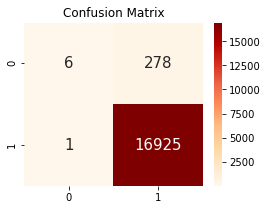

In [197]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [265]:
#negative가 275개가 되지 않아 50개로 줄임
positive_random_idx = review[review['y']==1].sample(500, random_state=12).index.tolist()
negative_random_idx = review[review['y']==0].sample(500, random_state=12).index.tolist()

In [266]:
random_idx = positive_random_idx + negative_random_idx
x = tf_idf_vect[random_idx]
y = review['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)


In [267]:
x_test.shape, y_test.shape

((250, 8863), (250,))

In [268]:
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)

In [269]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))


accuracy: 0.77
precision: 0.75
recall: 0.78
F1: 0.76


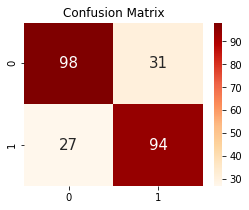

In [270]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()


In [271]:
#lr2.coef_

<BarContainer object of 8863 artists>

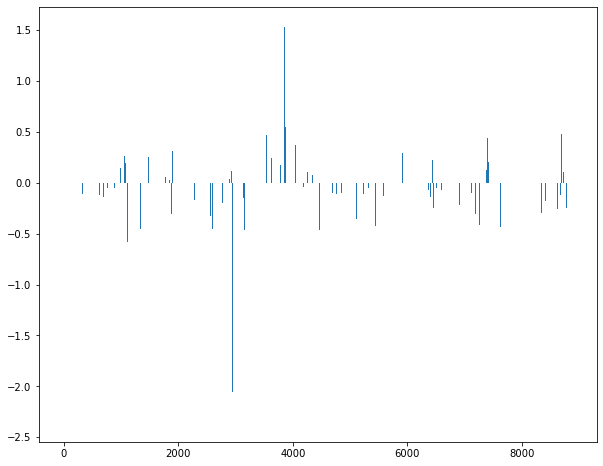

In [272]:
# print logistic regression's coef

plt.figure(figsize=(10, 8))
plt.bar(range(len(lr2.coef_[0])), lr2.coef_[0])


In [273]:
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[-5:])
# enumerate: 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환함


[(1.5338089611431367, 3853), (1.2760058410184731, 6275), (1.243084109356138, 7544), (1.2022917630770082, 6624), (1.15385418820774, 3859)]
[(-1.4614749258432822, 50), (-1.651119029734587, 8434), (-1.8437265980680941, 4496), (-2.0572769804589157, 2945), (-2.3512661443927394, 3153)]


In [274]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)
coef_pos_index


[(1.5338089611431367, 3853),
 (1.2760058410184731, 6275),
 (1.243084109356138, 7544),
 (1.2022917630770082, 6624),
 (1.15385418820774, 3859),
 (1.1512535811608189, 7094),
 (1.0516690460470832, 1938),
 (0.984440321831402, 849),
 (0.9526497026964281, 2402),
 (0.9266516521837628, 2309),
 (0.9145474424839798, 3671),
 (0.8913290201086888, 8587),
 (0.889261999064153, 2359),
 (0.8415904542652339, 4647),
 (0.8336946797528765, 6280),
 (0.8260694372597623, 1799),
 (0.8127868969542286, 5130),
 (0.8071624745296331, 4087),
 (0.796736695007999, 6073),
 (0.7876446111782531, 3021),
 (0.7873470147229454, 655),
 (0.7487717503670474, 8240),
 (0.7090637836089423, 1455),
 (0.6899402122123622, 353),
 (0.6870960360877149, 2492),
 (0.6755443173517366, 7565),
 (0.6712438298114634, 2647),
 (0.6506671270605117, 8074),
 (0.6497047070415308, 3044),
 (0.644983386847665, 5129),
 (0.6323570910418836, 7607),
 (0.6255678454016868, 8399),
 (0.5975181715565895, 6129),
 (0.582655591442028, 7213),
 (0.5689471405548221, 426

In [275]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer


{1799: '두께',
 1938: '디자인',
 3853: '색감',
 3: '가격',
 3859: '색도',
 849: '기본',
 4059: '셔츠',
 3539: '빳빳',
 4087: '소재',
 5130: '여리해',
 3208: '보이',
 7535: '커서',
 5111: '여기저기',
 7296: '청바지',
 4327: '슬랙스',
 7468: '치마',
 7495: '카라',
 5973: '이어도',
 2327: '마냥',
 2687: '무난',
 7876: '특성',
 6760: '주름',
 6285: '자켓',
 4636: '아유',
 1446: '다른',
 4132: '쇼핑몰',
 6957: '진짜',
 5110: '여기',
 6592: '제일',
 4250: '스커트',
 3153: '별로',
 3638: '사려',
 6624: '조금',
 1918: '등록',
 1254: '네이버',
 8024: '페이',
 655: '구매',
 2321: '링클',
 8153: '프리',
 5425: '옷감',
 641: '구김',
 6073: '일리',
 6470: '전부',
 3735: '살짝',
 1806: '두운',
 7243: '채도',
 228: '개인',
 75: '가을',
 2723: '무엇',
 3871: '색상',
 2359: '마음',
 3447: '블루',
 8677: '홈페이지',
 3681: '사진',
 1383: '느낌',
 637: '구가',
 6400: '재질',
 8685: '화면',
 8349: '핑크색',
 352: '검정',
 4337: '슬렉스',
 4899: '어디',
 6275: '자주',
 5575: '요즘',
 1128: '날씨',
 3857: '색깔',
 5123: '여름',
 7400: '추가',
 5394: '오피스',
 1502: '단골',
 5163: '여태',
 6061: '인터넷',
 2597: '모두',
 2402: '만족',
 7262: '처음',
 4721: '안지',
 6845: 

In [276]:
for coef in coef_pos_index[:100]:
    print(invert_index_vectorizer[coef[1]], coef[0])

색감 1.5338089611431367
자주 1.2760058410184731
컬러 1.243084109356138
조금 1.2022917630770082
색도 1.15385418820774
쫀쫀 1.1512535811608189
디자인 1.0516690460470832
기본 0.984440321831402
만족 0.9526497026964281
리하 0.9266516521837628
사이즈 0.9145474424839798
허리 0.8913290201086888
마음 0.889261999064153
아주 0.8415904542652339
자체 0.8336946797528765
두께 0.8260694372597623
여리해 0.8127868969542286
소재 0.8071624745296331
일리 0.796736695007999
배송 0.7876446111782531
구매 0.7873470147229454
핏되 0.7487717503670474
다만 0.7090637836089423
검정색 0.6899402122123622
매치 0.6870960360877149
코디 0.6755443173517366
몸매 0.6712438298114634
포인트 0.6506671270605117
밴딩 0.6497047070415308
여리핏 0.644983386847665
퀄리티 0.6323570910418836
하이 0.6255678454016868
입구 0.5975181715565895
착용 0.582655591442028
스타일 0.5689471405548221
무엇 0.5684498222627572
팔이 0.5551410563959284
색상 0.5511083810950458
블랙 0.5412143568971409
핑크색 0.5401554135180691
두툼해 0.5256249943368563
대로 0.5208723755443938
소매 0.5185609490874933
날씨 0.5145688576473013
의사 0.5017032764972519
슬림 0.494

In [294]:
for coef in coef_neg_index[:100]:
    print(invert_index_vectorizer[coef[1]], coef[0])

별로 -2.3512661443927394
반품 -2.0572769804589157
실망 -1.8437265980680941
한번 -1.651119029734587
가슴 -1.4614749258432822
취소 -1.275241000250656
단추 -1.0780765535395025
달라 -1.0266658320723787
부분 -0.984773560291632
내복 -0.9664739481480839
정도 -0.9656458247121008
교환 -0.9364441595247325
검수 -0.922063796095766
최악 -0.903239690378667
만원 -0.8880741168636114
가격 -0.8550405834947412
엉망 -0.8445244840774506
당황 -0.8149093135266176
마감 -0.7855818023550116
타이트해 -0.7696634903569652
세탁 -0.7690704987553297
실밥 -0.7647727863777112
절대 -0.7444533597051496
해도 -0.7428997283241048
환불 -0.7390656534199965
몇번 -0.7377292274961667
사람 -0.7287363348128111
자꾸 -0.7046104975526746
다른 -0.6930315456406246
쇼핑몰 -0.6894923027505926
불만족 -0.6870029343766224
대비 -0.673624743028978
구멍 -0.6671578404861775
지연 -0.6429703054579927
수준 -0.6360955340626084
리뷰 -0.6310820091687499
상품 -0.6272406495671852
천원 -0.6220138868107504
사진 -0.6088545133458355
실제 -0.6075928584818028
어깨 -0.6062945964439908
아동복 -0.5933402517126362
진짜 -0.5868692075554167
재질 -0.585104

In [293]:
coef_list=pd.DataFrame(invert_index_vectorizer[coef[1]], coef[0])
coef_list

ValueError: DataFrame constructor not properly called!

In [280]:
invert_index_vectorizer

{1799: '두께',
 1938: '디자인',
 3853: '색감',
 3: '가격',
 3859: '색도',
 849: '기본',
 4059: '셔츠',
 3539: '빳빳',
 4087: '소재',
 5130: '여리해',
 3208: '보이',
 7535: '커서',
 5111: '여기저기',
 7296: '청바지',
 4327: '슬랙스',
 7468: '치마',
 7495: '카라',
 5973: '이어도',
 2327: '마냥',
 2687: '무난',
 7876: '특성',
 6760: '주름',
 6285: '자켓',
 4636: '아유',
 1446: '다른',
 4132: '쇼핑몰',
 6957: '진짜',
 5110: '여기',
 6592: '제일',
 4250: '스커트',
 3153: '별로',
 3638: '사려',
 6624: '조금',
 1918: '등록',
 1254: '네이버',
 8024: '페이',
 655: '구매',
 2321: '링클',
 8153: '프리',
 5425: '옷감',
 641: '구김',
 6073: '일리',
 6470: '전부',
 3735: '살짝',
 1806: '두운',
 7243: '채도',
 228: '개인',
 75: '가을',
 2723: '무엇',
 3871: '색상',
 2359: '마음',
 3447: '블루',
 8677: '홈페이지',
 3681: '사진',
 1383: '느낌',
 637: '구가',
 6400: '재질',
 8685: '화면',
 8349: '핑크색',
 352: '검정',
 4337: '슬렉스',
 4899: '어디',
 6275: '자주',
 5575: '요즘',
 1128: '날씨',
 3857: '색깔',
 5123: '여름',
 7400: '추가',
 5394: '오피스',
 1502: '단골',
 5163: '여태',
 6061: '인터넷',
 2597: '모두',
 2402: '만족',
 7262: '처음',
 4721: '안지',
 6845: 

In [281]:
for coef in coef_neg_index:
      print(invert_index_vectorizer[coef[1]], coef[0])

별로 -2.3512661443927394
반품 -2.0572769804589157
실망 -1.8437265980680941
한번 -1.651119029734587
가슴 -1.4614749258432822
취소 -1.275241000250656
단추 -1.0780765535395025
달라 -1.0266658320723787
부분 -0.984773560291632
내복 -0.9664739481480839
정도 -0.9656458247121008
교환 -0.9364441595247325
검수 -0.922063796095766
최악 -0.903239690378667
만원 -0.8880741168636114
가격 -0.8550405834947412
엉망 -0.8445244840774506
당황 -0.8149093135266176
마감 -0.7855818023550116
타이트해 -0.7696634903569652
세탁 -0.7690704987553297
실밥 -0.7647727863777112
절대 -0.7444533597051496
해도 -0.7428997283241048
환불 -0.7390656534199965
몇번 -0.7377292274961667
사람 -0.7287363348128111
자꾸 -0.7046104975526746
다른 -0.6930315456406246
쇼핑몰 -0.6894923027505926
불만족 -0.6870029343766224
대비 -0.673624743028978
구멍 -0.6671578404861775
지연 -0.6429703054579927
수준 -0.6360955340626084
리뷰 -0.6310820091687499
상품 -0.6272406495671852
천원 -0.6220138868107504
사진 -0.6088545133458355
실제 -0.6075928584818028
어깨 -0.6062945964439908
아동복 -0.5933402517126362
진짜 -0.5868692075554167
재질 -0.585104

날날 0.0
날다람쥐 0.0
날더 0.0
날따뜻햐져 0.0
날로 0.0
날뻔 0.0
날수 0.0
날씬 0.0
날씬이 0.0
날씬이들 0.0
날씬이핏 0.0
날씬체형 0.0
날씬핏 0.0
날씬핏이 0.0
날씬햐 0.0
날씸 0.0
날씽 0.0
날씽해버요용 0.0
날좀 0.0
날줄 0.0
날풀리먄 0.0
남겻 0.0
남고 0.0
남구 0.0
남군 0.0
남대문 0.0
남만 0.0
남방 0.0
남사 0.0
남새 0.0
남색 0.0
남심 0.0
남아 0.0
남아도 0.0
남유진 0.0
남자 0.0
남친 0.0
남편 0.0
남힙 0.0
납니댱 0.0
납득 0.0
낫다 0.0
낫밷낟 0.0
낭낭해 0.0
낭비 0.0
낭씬 0.0
낭창거려 0.0
낭창낭창 0.0
낭패 0.0
낯선 0.0
내기 0.0
내려쥬 0.0
내면 0.0
내부 0.0
내심 0.0
내용 0.0
내용물 0.0
내의 0.0
내장 0.0
내적 0.0
내지 0.0
내추럴 0.0
내츄럴 0.0
낼때 0.0
냄새뺴 0.0
냅둿어 0.0
냇닌 0.0
냉감 0.0
냉방 0.0
냉장고 0.0
냉장고바지 0.0
냉큼 0.0
냠새 0.0
너무옙허 0.0
너무쫀쫀 0.0
너무쫀쫑 0.0
너무핏 0.0
너뭄 0.0
너므 0.0
너엄 0.0
넊힘 0.0
널널 0.0
널널한핏 0.0
널널함 0.0
널널햇 0.0
널넔애 0.0
널럴 0.0
널럴해 0.0
널럴했 0.0
널리 0.0
널해 0.0
넒은데 0.0
넓어욬 0.0
넓이 0.0
넘귀얍 0.0
넘긔여워 0.0
넘나릐 0.0
넘넘예뽀용 0.0
넘넘예뿜 0.0
넘맘에듭니 0.0
넘엄 0.0
넘예뻐욘 0.0
넘예뻐욤 0.0
넘예뽀 0.0
넘예뿜 0.0
넘예쁌 0.0
넘이버 0.0
넘이뽀 0.0
넘이뽀영 0.0
넘이뽀용 0.0
넘흐 0.0
넝이뻐 0.0
넣고핏 0.0
넣기 0.0
네가지 0.0
네로 0.0
네마 0.0
네모 0.0
네스 0.0
네야 0.0
네이비 0.0
네일아트 0.0
네트 0.0
넥부분 0.0
넥부분앞 0.0
넥스 0.0
넥이 0.0
넥카 0.0
넥티 0.0
넥파임 0

봉선 0.0
봉지 0.0
봏습니 0.0
봏아 0.0
봣눈데 0.0
봣는 0.0
봣는데 0.0
봣던 0.0
봤는뎈 0.0
부가 0.0
부곽되어 0.0
부근 0.0
부글 0.0
부농 0.0
부담스렂 0.0
부담스렇 0.0
부담잆 0.0
부덤 0.0
부드 0.0
부드라운 0.0
부드라워 0.0
부드러움 0.0
부드르 0.0
부득이 0.0
부들 0.0
부등 0.0
부듷 0.0
부디 0.0
부라 0.0
부라자 0.0
부러 0.0
부령 0.0
부로 0.0
부르럽구 0.0
부리 0.0
부모님 0.0
부바 0.0
부부 0.0
부붐 0.0
부산 0.0
부스럭 0.0
부실 0.0
부아악 0.0
부어 0.0
부여 0.0
부왕 0.0
부위 0.0
부유 0.0
부이넷 0.0
부자 0.0
부자연 0.0
부잣집 0.0
부정 0.0
부족 0.0
부착 0.0
부츠컷핏 0.0
부츠핏 0.0
부케 0.0
부탁 0.0
부탁드료 0.0
부풀 0.0
부프러기 0.0
부피 0.0
부함 0.0
부합 0.0
북한 0.0
분간 0.0
분과 0.0
분들껜 0.0
분레 0.0
분리 0.0
분석 0.0
분위 0.0
분전 0.0
분추 0.0
분필 0.0
분한 0.0
분홍색 0.0
분홍샛 0.0
불가 0.0
불가능 0.0
불기 0.0
불랙 0.0
불량품 0.0
불루 0.0
불륨 0.0
불리 0.0
불만 0.0
불매 0.0
불면 0.0
불안감 0.0
불어 0.0
불찰 0.0
불퍈해 0.0
불호 0.0
붉은빛 0.0
붕떠요걸 0.0
붕뜨네 0.0
붕뜬감 0.0
붕뜹니 0.0
붕입 0.0
붕홍색 0.0
붙는핏 0.0
붙어욤 0.0
뷔스티 0.0
뷔스티에 0.0
뷔페 0.0
뷰각 0.0
뷰터 0.0
뷴들 0.0
브다고그랫 0.0
브담 0.0
브라렛 0.0
브라렛끈 0.0
브라마 0.0
브라이언 0.0
브래지어 0.0
브레지어 0.0
브르노 0.0
브리 0.0
브릭 0.0
브린 0.0
브샤 0.0
브샤용 0.0
브이 0.0
브이넥 0.0
브이넷 0.0
블게 0.0
블락 0.0
블란쳇 0.0
블랙원피스 0.0
블러 0.0
블

예술 0.0
예술인 0.0
예식 0.0
예식장 0.0
예용 0.0
예입 0.0
예정일 0.0
예측 0.0
예프고 0.0
옐로 0.0
옐로우 0.0
옘버 0.0
옘버용 0.0
옘브 0.0
옙버 0.0
옙버용 0.0
옙뻐 0.0
옙쁘 0.0
옙쁩니당 0.0
옙어용 0.0
오겟됴 0.0
오공 0.0
오금 0.0
오기 0.0
오냐 0.0
오늘이 0.0
오니 0.0
오드 0.0
오라 0.0
오락가락 0.0
오래오래 0.0
오랜지 0.0
오렌지 0.0
오렌지색 0.0
오렍 0.0
오른발 0.0
오름 0.0
오리 0.0
오리가 0.0
오리궁 0.0
오마이갓 0.0
오만 0.0
오만원 0.0
오매불망 0.0
오목 0.0
오므리 0.0
오반 0.0
오백만 0.0
오부 0.0
오브 0.0
오비 0.0
오빠 0.0
오산 0.0
오색 0.0
오어 0.0
오염 0.0
오오 0.0
오오사이 0.0
오오오 0.0
오오오오 0.0
오오오오오오오 0.0
오옷 0.0
오용 0.0
오우 0.0
오우이 0.0
오유 0.0
오이 0.0
오일 0.0
오잉 0.0
오자 0.0
오장육부 0.0
오제 0.0
오져욤 0.0
오져욬 0.0
오조 0.0
오조오억 0.0
오조오천 0.0
오즘 0.0
오쩌 0.0
오차 0.0
오케이 0.0
오키 0.0
오프라인 0.0
오프숄 0.0
오프숄더티 0.0
오픈 0.0
오픈숄더 0.0
오피셜 0.0
오해 0.0
옥추 0.0
온갖 0.0
온달 0.0
온도 0.0
온라인 0.0
온라인쇼핑 0.0
온몸 0.0
온에어 0.0
올가을 0.0
올려줫음 0.0
올려쥬세 0.0
올려쥬셔 0.0
올리브 0.0
올리브색 0.0
올릴때힙 0.0
올블랙 0.0
올여름 0.0
올챙이 0.0
옴겨 0.0
옴그 0.0
옴청 0.0
옴청삿 0.0
옵니댱 0.0
옵션 0.0
옶어 0.0
옷기장 0.0
옷깃 0.0
옷답 0.0
옷더 0.0
옷둘 0.0
옷뒷트임 0.0
옷리 0.0
옷맵시 0.0
옷발 0.0
옷버실때 0.0
옷빨 0.0
옷사 0.0
옷삼 0.0
옷색 0.0
옷소매 0.0
옷얖 0.0
옷업

최근 0.0
최대 0.0
최대로 0.0
최대한 0.0
최상 0.0
최소 0.0
최애 0.0
최저 0.0
최적화 0.0
쵝오 0.0
쵝오쵝오 0.0
춐춐해 0.0
추강 0.0
추구 0.0
추근 0.0
추기 0.0
추나 0.0
추럴 0.0
추리닝 0.0
추사 0.0
추색 0.0
추석 0.0
추움 0.0
추위 0.0
추장 0.0
추정 0.0
추찬 0.0
추천드랴 0.0
추천드령 0.0
추첞 0.0
추첨 0.0
추첮입니루거차으 0.0
추친 0.0
추켜 0.0
추턴해 0.0
축감 0.0
축복 0.0
축성 0.0
축소 0.0
춘하 0.0
춘해 0.0
출감 0.0
출근길 0.0
출리 0.0
출발 0.0
출산 0.0
출시 0.0
출퇴근 0.0
춥네욤 0.0
춥다 0.0
충분 0.0
충성 0.0
충족 0.0
취저 0.0
취저슬림 0.0
취저에용 0.0
취처였슴니당 0.0
츄리 0.0
츄리닝 0.0
츄유 0.0
츄천 0.0
츄천해 0.0
츠이느 0.0
측면 0.0
층거 0.0
치가 0.0
치기 0.0
치도 0.0
치렁 0.0
치마폭 0.0
치마핏 0.0
치맛단 0.0
치머 0.0
치면 0.0
치바 0.0
치아 0.0
치약 0.0
치어리더 0.0
치의 0.0
치하 0.0
칙용감 0.0
칙크림 0.0
친창찬 0.0
친한친구 0.0
칠천원 0.0
침대 0.0
칫되 0.0
칭것 0.0
칭구 0.0
칭구들 0.0
칭찬 0.0
카라넥 0.0
카라만 0.0
카라멜 0.0
카르 0.0
카린 0.0
카메라 0.0
카멜 0.0
카버 0.0
카베 0.0
카시 0.0
카이 0.0
카카오 0.0
카캬캬 0.0
카키 0.0
카키빛 0.0
카키색 0.0
카테고리 0.0
카톡 0.0
카페 0.0
카프 0.0
칼라 0.0
칼발 0.0
캉캉 0.0
캐릭터 0.0
캐미솔 0.0
캐스터 0.0
캐시미어 0.0
캔디 0.0
캠퍼스 0.0
캠핑 0.0
캡쳐 0.0
커뇻 0.0
커리 0.0
커리어우먼 0.0
커민 0.0
커밋 0.0
커밍 0.0
커보렸는데 0.0
커욤 0.0
커트 0.0
커튼 0.0
커팅 0.0
커프스

In [287]:
invert_index_vectorizer[coef[1]], coef[0]

('색감', 1.5338089611431367)

# 2번째 감성분석 : tensorflow, keras를 이용한 감성분석

In [134]:
review=pd.read_excel('review형태소.xlsx')
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57364 entries, 0 to 57363
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     57364 non-null  object
 1   평점      57364 non-null  int64 
 2   리뷰내용    57363 non-null  object
 3   리뷰명사    57364 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.8+ MB


In [135]:
review.isnull().sum()

상품명     0
평점      0
리뷰내용    1
리뷰명사    0
dtype: int64

In [139]:
review.iloc[2487,:]

상품명     노버 퍼프 스퀘어티
평점               1
리뷰내용           NaN
리뷰명사            []
Name: 2487, dtype: object